## contents

1. position 함수

2. 방법1) 단순 무작위 데이터

3. 방법2) 시작점, 끝점 사이

4. 시각화

5. csv파일에 합병

### position 함수
그리드의 위치를 좌표 상에 표현하기 위한 함수

In [4]:
import pandas as pd
import itertools

# CSV 파일을 DataFrame으로 불러옵니다.
path_df = pd.read_csv(r"..\..\output\SL preprocessing\dbs_intrp_comb_output.csv")
grid_df = pd.read_csv(r"..\..\output\SL preprocessing\dbs_intrp_labeled.csv")
grid_num_df = pd.DataFrame()

# output 열이 'AN'인 행을 필터링하고, 해당 행의 grid_label 열 값을 가져옵니다.
AN_grid = path_df[path_df['output'] == 'AN']['grid_label'].tolist()  # tolist() 메서드를 사용하여 리스트로 변환
all_grid = sorted(set(grid_df['grid_label'].tolist()))

def position(grid):
    #[:2]처리
    letters = [chr(i) for i in range(ord('A'), ord('Z')+1)] # AA~ZZ
    prefix = [''.join(pair) for pair in itertools.product(letters, repeat=2)] # 길이가 2인 모든 조합
    prefix.sort()
    prefix_x,prefix_y = prefix.index(grid[:2])%26 * 64, prefix.index(grid[:2])//26 *64

    #[2:]처리
    label_element = ['A','B','C','D']
    move_x = [-0.5,0.5,-0.5,0.5]
    move_y = [0.5,0.5,-0.5,-0.5]
    len_label = len(grid[2:])

    now_x, now_y = 2**len_label, 2**len_label
    n = len_label
    for g in grid[2:]:
        middle = 2**n
        now_x += middle * move_x[label_element.index(g)]
        now_y += middle * move_y[label_element.index(g)]
        n -= 1
    suffix_x,suffix_y = (now_x-1)//2+1, (now_y-1)//2+1
    
    #[:2] + [2:]
    x,y = prefix_x + suffix_x, prefix_y + suffix_y
   
    return int(x),int(y)
    

print(position('AACCCCCC'))

(1, 1)


### 방법1) 단순 무작위 데이터
AN로 판단된 그리드를 {n}개 선택하여, {m}개 그리드로 구성된 fake_path 데이터를 생성

In [8]:
import pandas as pd
import itertools
import random

n = 2
m = 10
fakepath_count = 300

# CSV 파일을 DataFrame으로 불러옵니다.
path_df = pd.read_csv(r"..\..\output\SL preprocessing\dbs_intrp_comb_output.csv")
grid_df = pd.read_csv(r"..\..\output\SL preprocessing\dbs_intrp_labeled.csv")
grid_num_df = pd.DataFrame()

# output 열이 'AN'인 행을 필터링하고, 해당 행의 grid_label 열 값을 가져옵니다.
AN_grid = path_df[path_df['output'] == 'AN']['grid_label'].tolist()  # 리스트로 변환
all_grid = sorted(set(grid_df['grid_label'].tolist()))

# fake_path 리스트를 생성
fake_path = []

# 중복된 리스트가 생성되지 않도록 세트를 사용
unique_combinations = set()

# fake_data에 추가할 리스트 생성 함수
def generate_fake_data(n,m):
    while True:
        # AN_grid에서 랜덤으로 n개 선택
        selected_AN = random.sample(AN_grid, n)

        # all_grid에서 AN_grid에서 고르지 않은 나머지 항목 중에서 m-n개 선택
        remaining_grids = list(set(all_grid) - set(selected_AN))
        selected_remaining = random.sample(remaining_grids, m - n)

        # 선택한 두 리스트를 합쳐 무작위로 섞음
        combined = selected_AN + selected_remaining
        random.shuffle(combined)

        # 중복을 피하기 위해 세트에 추가
        if tuple(combined) not in unique_combinations:
            unique_combinations.add(tuple(combined))
            return combined

# fake_data 리스트에 추가
for _ in range(fakepath_count):  # 100개의 리스트를 생성
    fake_path.append(generate_fake_data(n=n,m=m))

# 결과 확인
for f in fake_path:
    print(f)


['KDDADCAA', 'JFCDBCAB', 'KECAAABA', 'KECDACDD', 'JEABBADC', 'KECCBACC', 'KEACDCCC', 'JFCDBACC', 'KFBADBAA', 'KEACCDCD']
['KECCBAAB', 'JFDCADBA', 'JEABBADC', 'KEACCDDA', 'KEADCCDB', 'GJDACBAB', 'KEBCCBAC', 'JEDAABDC', 'KECAACDB', 'KFBABDCC']
['JEBCCAAC', 'KFBABDCC', 'KECABDDA', 'JEDBCACB', 'JEDBCADB', 'KEACDBDC', 'JFCADDBB', 'JEDBCBCD', 'IFDBADBA', 'JEDBCDBA']
['IFDBADDA', 'KFBABDCB', 'GJADDDDD', 'KECADBDA', 'KFBABDDA', 'JEDADAAD', 'KEBCADDA', 'IFDBBCBB', 'JEBCCAAC', 'KECDDCBD']
['IFDBADDA', 'JFCACCBD', 'IFDBBCBB', 'JEDBDDDB', 'KDDBCDDC', 'KFBADBAA', 'KEADDACD', 'JEADBADB', 'KEBACDDB', 'KFBABDBA']
['JEADBADB', 'KEADCCDA', 'KFCCADCB', 'KEACDCAD', 'JFDCADAC', 'KDDBDACC', 'KECABBAA', 'JEDBDCDA', 'KECCBCAB', 'KECADAAB']
['JEADBDDA', 'KFADCBAB', 'JEDBDCCB', 'JFCACCDA', 'KFCCADCB', 'GJCBBADB', 'KECDBCAA', 'KDDBDAAA', 'KECADABD', 'KDDADCAA']
['KDDBCBDB', 'JEDADBAC', 'JEABBCAD', 'IFDBADBA', 'GJADDDDD', 'GJCBBACD', 'KFBABDCD', 'KFBABDBB', 'KEBCADBB', 'JEBCCCAD']
['KECABBDC', 'JFCDAABD', 'KECCDB

### 방법2) 시작점, 끝점 사이
AN로 판단된 경로의 시작점과 끝점이 그리는 사각형 내에서 무작위로 fake_path 생성

In [ ]:
import pandas as pd

# CSV 파일을 DataFrame으로 불러옵니다.
path_df = pd.read_csv(r"..\..\output\SL preprocessing\dbs_intrp_fin.csv")
grid_df = pd.read_csv(r"..\..\output\SL preprocessing\dbs_intrp_labeled.csv")
grid_num_df = pd.DataFrame()

# output 열이 'AN'인 행을 필터링하고, 해당 행의 grid_label 열 값을 가져옵니다.
AN_grid = path_df[path_df['output'] == 'AN']['grid_path'].tolist()  # tolist() 메서드를 사용하여 리스트로 변환
AN_grid = [eval(item) for item in AN_grid] #eval 함수: 문자열을 Python 표현식으로 평가하여 리스트로 변환
all_grid = sorted(set(grid_df['grid_label'].tolist()))

# gridnum
gridnum_file_path = r"..\..\output\SL preprocessing\dbs_intrp_gridnum.csv"

gridnum_records = []
for g in all_grid:
    x, y = position(g)
    gridnum_records.append({'grid_label': g, 'x': x, 'y': y})

gridnum_df = pd.DataFrame(gridnum_records)
gridnum_df.to_csv(gridnum_file_path, index=False)

In [12]:
import pandas as pd
import itertools
import random

# CSV 파일을 DataFrame으로 불러옵니다.
path_df = pd.read_csv(r"..\..\output\SL preprocessing\dbs_intrp_fin.csv")
grid_df = pd.read_csv(r"..\..\output\SL preprocessing\dbs_intrp_labeled.csv")
grid_num_df = pd.DataFrame()

# output 열이 'AN'인 행을 필터링하고, 해당 행의 grid_label 열 값을 가져옵니다.
AN_grid = path_df[path_df['output'] == 'AN']['grid_path'].tolist()  # tolist() 메서드를 사용하여 리스트로 변환
AN_grid = [eval(item) for item in AN_grid] #eval 함수: 문자열을 Python 표현식으로 평가하여 리스트로 변환
all_grid = sorted(set(grid_df['grid_label'].tolist()))

# 경로 만들기
def make_fake_path(AN_path):
    # 1. 경로 만들기 위한 구역안의 그리드 가져오기
    gridnum_df = pd.read_csv(r"..\..\output\SL preprocessing\dbs_intrp_gridnum.csv")
    start_grid, end_grid = AN_path[0],AN_path[-1]
    start_gridnum = gridnum_df[gridnum_df['grid_label'] == start_grid]
    end_gridnum = gridnum_df[gridnum_df['grid_label'] == end_grid]

    if not start_gridnum.empty:
        start_gridnum_x = start_gridnum['x'].values[0]
        start_gridnum_y = start_gridnum['y'].values[0]
    else:
        raise ValueError(f"Start grid '{start_grid}' not found in gridnum_df")

    if not end_gridnum.empty:
        end_gridnum_x = end_gridnum['x'].values[0]
        end_gridnum_y = end_gridnum['y'].values[0]
    else:
        raise ValueError(f"End grid '{end_grid}' not found in gridnum_df")

    if start_gridnum_x > end_gridnum_x:
        start_gridnum_x, end_gridnum_x = end_gridnum_x, start_gridnum_x
    if start_gridnum_y > end_gridnum_y:
        start_gridnum_y, end_gridnum_y = end_gridnum_y, start_gridnum_y

    in_grid = gridnum_df[(gridnum_df['x'] > start_gridnum_x) & (gridnum_df['x'] < end_gridnum_x) & (gridnum_df['y'] > start_gridnum_y) & (gridnum_df['y'] < end_gridnum_y)]
    if in_grid.empty:
        # print(f"{AN_path[0]} , {AN_path[-1]} 내에 데이터가 없습니다.")
        return False

    in_grid = in_grid['grid_label'].tolist()

    # 2. 경로 무작위 배치
    if len(in_grid) > 10:
        in_grid = random.sample(in_grid,10)

    permutations = list(map(list,itertools.permutations(in_grid)))
    fake_path = random.sample(list(permutations), min(len(permutations),150))
  
    return fake_path

fake_path = []
for p in AN_grid:
    path_li = make_fake_path(p)
    if path_li:
        fake_path.extend(path_li)

print('len(fake_path)',len(fake_path))
for i in fake_path:
    print(i)

len(fake_path) 463
['JEADDBBB', 'JEBCCCCB', 'JEBCCCAB', 'JEBCCAAC', 'JEBCCACA', 'JEBCCACD', 'JEBCCACC', 'JEBCCCAD']
['JEADDBBB', 'JEBCCCAD', 'JEBCCACD', 'JEBCCCCB', 'JEBCCACA', 'JEBCCAAC', 'JEBCCCAB', 'JEBCCACC']
['JEBCCACA', 'JEADDBBB', 'JEBCCCAB', 'JEBCCACC', 'JEBCCAAC', 'JEBCCCAD', 'JEBCCACD', 'JEBCCCCB']
['JEADDBBB', 'JEBCCCCB', 'JEBCCACD', 'JEBCCCAB', 'JEBCCCAD', 'JEBCCAAC', 'JEBCCACA', 'JEBCCACC']
['JEBCCCAB', 'JEBCCCCB', 'JEADDBBB', 'JEBCCACA', 'JEBCCACD', 'JEBCCCAD', 'JEBCCAAC', 'JEBCCACC']
['JEBCCACC', 'JEBCCACD', 'JEBCCCAB', 'JEBCCCCB', 'JEBCCCAD', 'JEBCCACA', 'JEBCCAAC', 'JEADDBBB']
['JEBCCACD', 'JEBCCCAD', 'JEBCCAAC', 'JEADDBBB', 'JEBCCCCB', 'JEBCCACA', 'JEBCCACC', 'JEBCCCAB']
['JEBCCACC', 'JEADDBBB', 'JEBCCCCB', 'JEBCCACA', 'JEBCCCAB', 'JEBCCCAD', 'JEBCCAAC', 'JEBCCACD']
['JEBCCACC', 'JEBCCACA', 'JEBCCCCB', 'JEADDBBB', 'JEBCCCAD', 'JEBCCACD', 'JEBCCAAC', 'JEBCCCAB']
['JEADDBBB', 'JEBCCCCB', 'JEBCCACC', 'JEBCCACA', 'JEBCCCAB', 'JEBCCACD', 'JEBCCCAD', 'JEBCCAAC']
['JEBCCCAB'

### 시각화

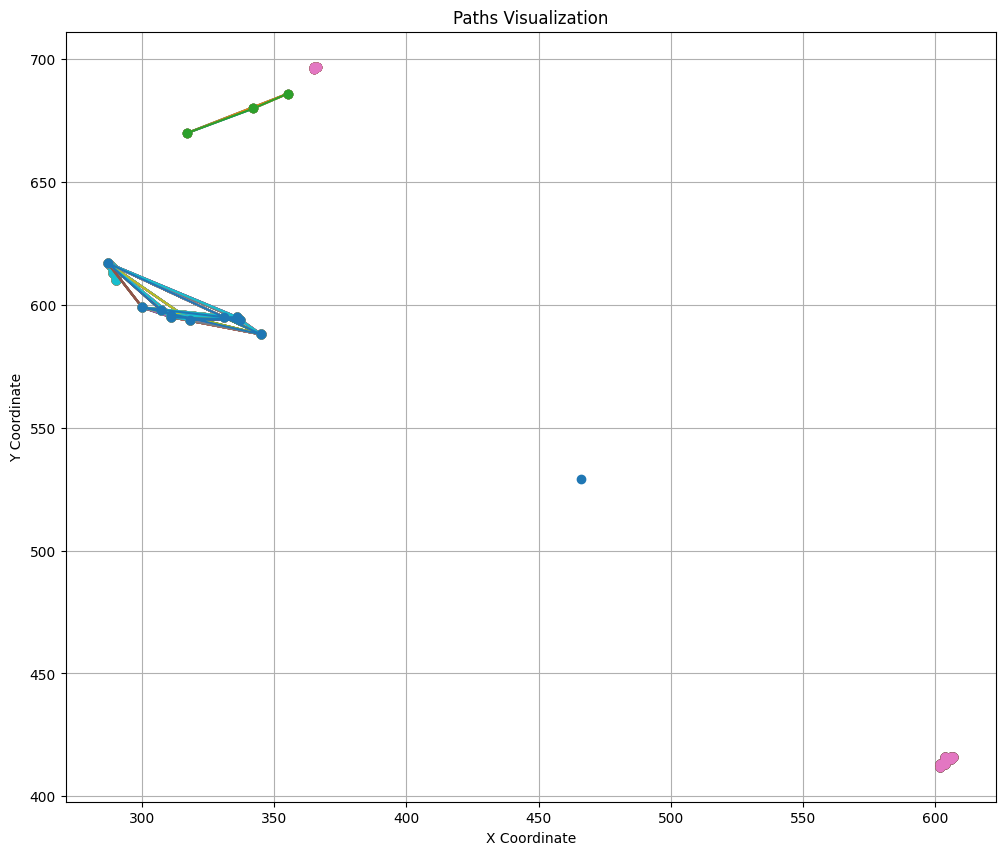

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools

# 시각화
plt.figure(figsize=(12, 10))

for i, path in enumerate(fake_path):
    x_coords = []
    y_coords = []
    for grid in path:
        x, y = position(grid)
        x_coords.append(x)
        y_coords.append(y)
    
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', label=f'Path {i+1}')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Paths Visualization')
# plt.legend()
plt.grid(True)
plt.show()

### csv 파일 합병

In [13]:
import pandas as pd

def append_data_to_another_csv(source_file, target_file, new_values):
    source_df = pd.read_csv(source_file)
    new_data = {'grid_path': new_values, 'output': ['AN'] * len(new_values)} # 추가할 데이터
    new_df = pd.DataFrame(new_data)
    updated_df = pd.concat([source_df, new_df], ignore_index=True) # 결합
    updated_df.to_csv(target_file, index=False)

# 예시 사용법
source_file_path = r"..\..\output\SL preprocessing\dbs_intrp_fin.csv"  # 원본 CSV 파일
target_file_path = r"..\..\output\SL preprocessing\dbs_intrp_add_fakedata(2).csv"  # 수정된 데이터를 추가할 대상 CSV 파일
fake_path = list(map(str,fake_path))

append_data_to_another_csv(source_file_path, target_file_path, fake_path)
print(f"{source_file_path} + {target_file_path}")

..\..\output\SL preprocessing\dbs_intrp_fin.csv + ..\..\output\SL preprocessing\dbs_intrp_add_fakedata(2).csv
